In [276]:
import numpy as np
import pandas as pd

import os

import matplotlib  as mpl
import matplotlib.pyplot as plt

import cv2

%matplotlib inline
# Optionally, tweak styles.
mpl.rc('figure',  figsize=(22*1.5, 12*1.5))
mpl.rc('image', cmap='gray')

(440, 560)


<Figure size 864x864 with 0 Axes>

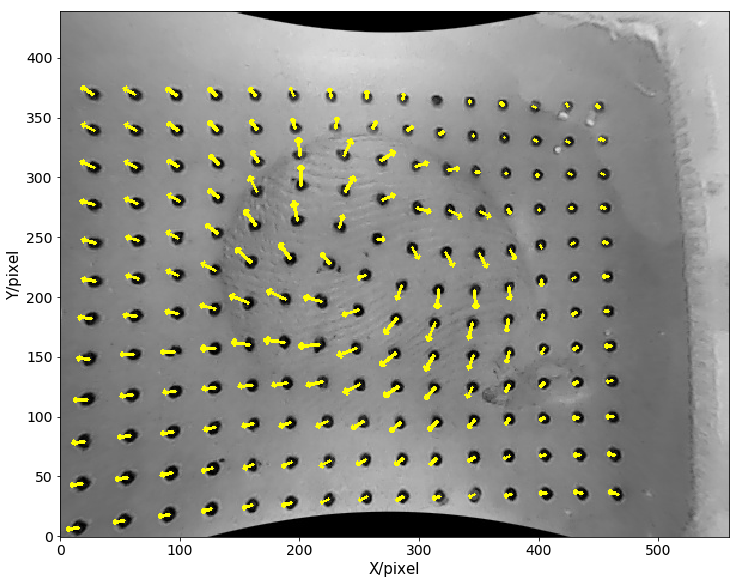

In [277]:
csv_name = '../dataset2/csv/0100.csv'
img_name = '../dataset2/images/0100.jpg'

csv_name = 'tracking/vectors1.csv'
img_name = 'tracking/image1.jpg'

plt.figure(figsize=(12, 12))


df = pd.read_csv(csv_name)
img = plt.imread(img_name)
print img.shape
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# draw arrows on images
# print df
x = df['x'].values
y = df['y'].values
xt = df['xt'].values
yt = df['yt'].values


if len(x) > 179:
    x = x[:179]
    y = y[:179]
    xt = xt[:179]
    yt = yt[:179]


# print x.max(), y.max()

img = img_rgb.copy()

for i in range(0, len(x)):

    cv2.arrowedLine(img, (int(np.around(x[i])), int(np.around(y[i]))),
                    (int(np.around(xt[i])), int(np.around(yt[i]))),
                    (255, 255, 0),
                    thickness=2,
                    tipLength=0.2,
                    )


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img, origin='lower')
plt.xlabel('X/pixel', fontsize=15)
plt.ylabel('Y/pixel', fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

In [278]:
from scipy.interpolate import RegularGridInterpolator, LinearNDInterpolator, NearestNDInterpolator, Rbf
from mpl_toolkits.mplot3d import Axes3D

# interpolate denser grid data in x and y separately
dx = xt - x
dy = yt - y

print dx.shape, dy.shape

%matplotlib notebook

# fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig)
# ax.scatter3D(x, y,  dx)

# fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig)
# ax.scatter3D(x, y,  dy)


# # interpolate
# from matplotlib.mlab import griddata

# dx_i = griddata(x, y, dx, xx, yy, interp='nn')
# dy_i = griddata(x, y, dy, xx, yy, interp='nn')

# # contour the gridded data, plotting dots at the nonuniform data points.
# fig = plt.figure(figsize=(12, 12))
# CS = plt.contourf(xx, yy, dx_i, 15, cmap=plt.cm.coolwarm_r,
#                   vmax=abs(dx_i).max(), vmin=-abs(dx_i).max())
# plt.colorbar()  # draw colorbar


# fig = plt.figure(figsize=(12, 12))
# CS = plt.contourf(xx, yy, dy_i, 15, cmap=plt.cm.coolwarm,
#                   vmax=abs(dy_i).max(), vmin=-abs(dy_i).max())
# plt.colorbar()


# mag = np.sqrt(dx_i**2 + dy_i**2)

# fig = plt.figure(figsize=(12, 12))
# CS = plt.contourf(xx, yy, mag, 15, cmap=plt.cm.coolwarm,
#                   vmax=abs(mag).max(), vmin=-abs(mag).max())
# plt.colorbar()






(179,) (179,)


(179,) (179,) (179,)
0.0 560.0 0.0 440.0
(900,)


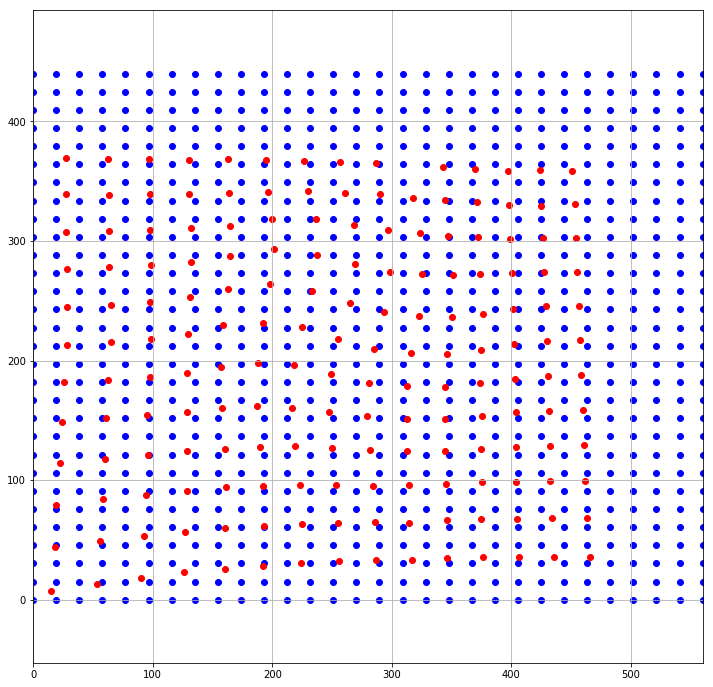

In [279]:
print x.shape, y.shape, dx.shape

interpolation_x = Rbf(x, y, dx)
interpolation_y = Rbf(x, y, dy)


Nx = 30
Ny = 30
xx = np.linspace(0, 560, Nx)
yy = np.linspace(0, 440, Ny)


XX, YY = np.array(np.meshgrid(xx, yy))

# XXX = np.hstack(XX).reshape((Nx*Ny, 1))
# YYY = np.hstack(YY).reshape((Nx*Ny, 1))
XXX = XX.ravel() # flatten
YYY = YY.ravel()

# draw the grid
%matplotlib inline

plt.figure(figsize=(12,12))
plt.scatter(XXX, YYY, color='blue')
plt.scatter(x, y, color='red')
plt.axis('equal')
plt.xlim(0.0, 560.0)
plt.ylim(0.0, 440.0)
plt.grid()
# print 

dx_interp = interpolation_x(XXX,YYY)
dy_interp = interpolation_y(XXX,YYY)

print XXX.min(), XXX.max(), YYY.min(), YYY.max()

mag = np.sqrt(dx_interp**2 + dy_interp**2)

print dx_interp.shape

(440, 560, 3)


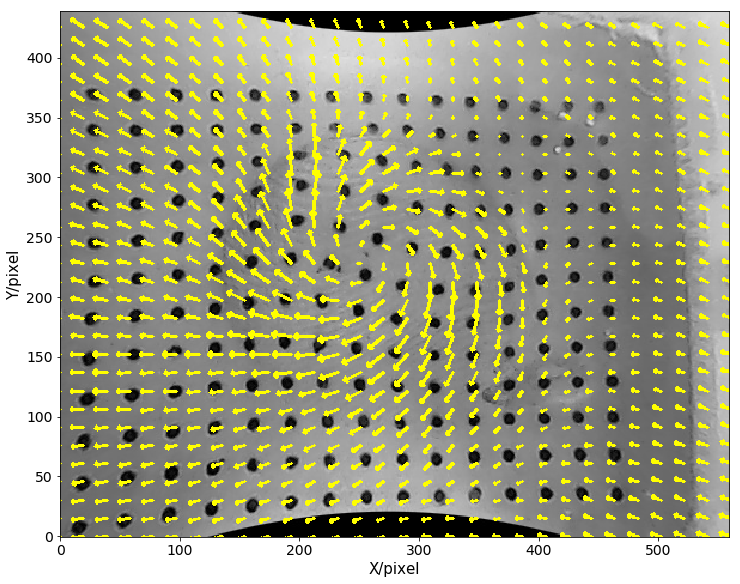

In [280]:
# draw the interpolated vectors on image
img = img_rgb.copy()

for i in range(0, len(XXX)):
    cv2.arrowedLine(img, (int(np.around(XXX[i])), int(np.around(YYY[i]))),
                    (int(np.around(XXX[i]+dx_interp[i])), int(np.around(YYY[i]+dy_interp[i]))), 
                    (255, 255, 0), 
                    thickness=2, 
                    tipLength=0.2,
                    line_type=8
                   )
    
print img.shape
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)
ax.imshow(img, origin='lower')

plt.xlabel('X/pixel',fontsize=15)
plt.ylabel('Y/pixel',fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)


In [281]:
# find the sum and average of dx_interp and dy_interp
sum_dx_i = np.sum(dx_interp)
sum_dy_i = np.sum(dy_interp)
print 'fx:', sum_dx_i, 'fy:', sum_dy_i


n_dx = len(dx_interp)

ave_dx_i = sum_dx_i/n_dx
ave_dy_i = sum_dy_i/n_dx

dx_i_deducted = dx_interp - ave_dx_i
dy_i_deducted = dy_interp - ave_dy_i

center_x = 0
center_y = 0
sum_abs_dx = np.sum(np.abs(dx_interp))
sum_abs_dy = np.sum(np.abs(dy_interp))


for i in range(0, len(dx_interp)):
    center_x += XXX[i]*np.abs(dx_interp[i])/sum_abs_dx
    center_y += YYY[i]*np.abs(dy_interp[i])/sum_abs_dy
print 'center:', center_x, center_y


center_x_quad = 0
center_y_quad = 0
sum_dx_quad = 0 
sum_dy_quad = 0
for i in range(0, len(dx_interp)):
#     print np.exp(0.1*np.abs(dx_interp[i])) - 1
    sum_dx_quad +=  np.exp(0.5*np.abs(dx_interp[i])) - 1
    sum_dy_quad +=  np.exp(0.5*np.abs(dy_interp[i])) - 1
print sum_dx_quad
for i in range(0, len(dx_interp)):
    center_x_quad += XXX[i]*(np.exp(0.5*np.abs(dx_interp[i])) - 1)/sum_dx_quad
    center_y_quad += YYY[i]*(np.exp(0.5*np.abs(dy_interp[i])) - 1)/sum_dy_quad
print 'center:', center_x_quad, center_y_quad




torque = 0
for i in range(0, len(dx_interp)):
    loc_diff_vec = np.array([XXX[i] - center_x, YYY[i] - center_y, 0])
    disp_vec = np.array([dx_i_deducted[i], dy_i_deducted[i], 0])
    
    tau = np.cross(loc_diff_vec, disp_vec)
#     print tau
    torque += tau[2]
    
print 'torque: ', torque


XXX_max_x = XXX[np.argmax(dx_interp)]
YYY_max_x = YYY[np.argmax(dx_interp)]
XXX_min_x = XXX[np.argmin(dx_interp)]
YYY_min_x = YYY[np.argmin(dx_interp)]

XXX_max_y = XXX[np.argmax(dy_interp)]
YYY_max_y = YYY[np.argmax(dy_interp)]
XXX_min_y = XXX[np.argmin(dy_interp)]
YYY_min_y = YYY[np.argmin(dy_interp)]

# print XXX_max, XXX_min, YYY_max, YYY_min



fx: -4971.193562757734 fy: 982.2257526126498
center: 230.33034498068514 251.6286337671589
103403.66450329809
center: 176.28673749469056 245.21545843330915
torque:  -297047.2240024153


(440, 560, 3)


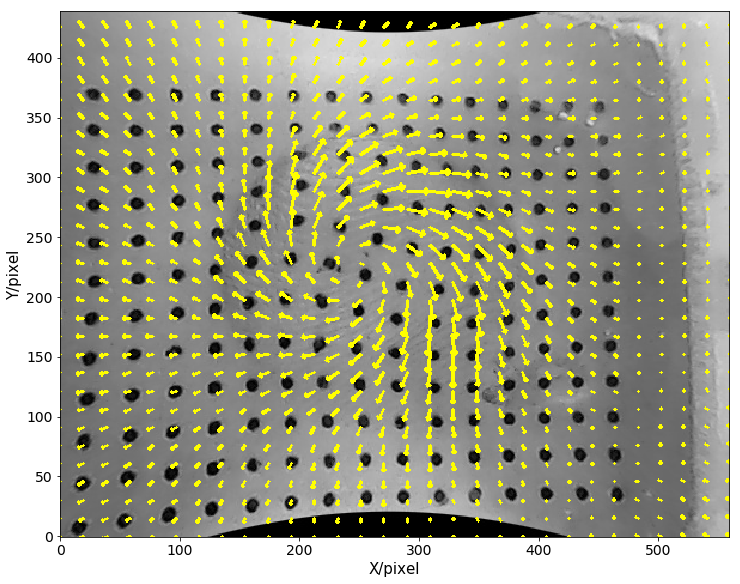

In [282]:
img = img_rgb.copy()

for i in range(0, len(XXX)):
    cv2.arrowedLine(img, (int(np.around(XXX[i])), int(np.around(YYY[i]))),
                    (int(np.around(XXX[i]+dx_i_deducted[i])), int(np.around(YYY[i]+dy_i_deducted[i]))), 
                    (255, 255, 0), 
                    thickness=2, 
                    tipLength=0.2,
                    line_type=8
                   )
    
print img.shape
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1,1,1)
ax.imshow(img, origin='lower')

plt.xlabel('X/pixel',fontsize=15)
plt.ylabel('Y/pixel',fontsize=15)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)

(900,) (900,) (900,)


<IPython.core.display.Javascript object>


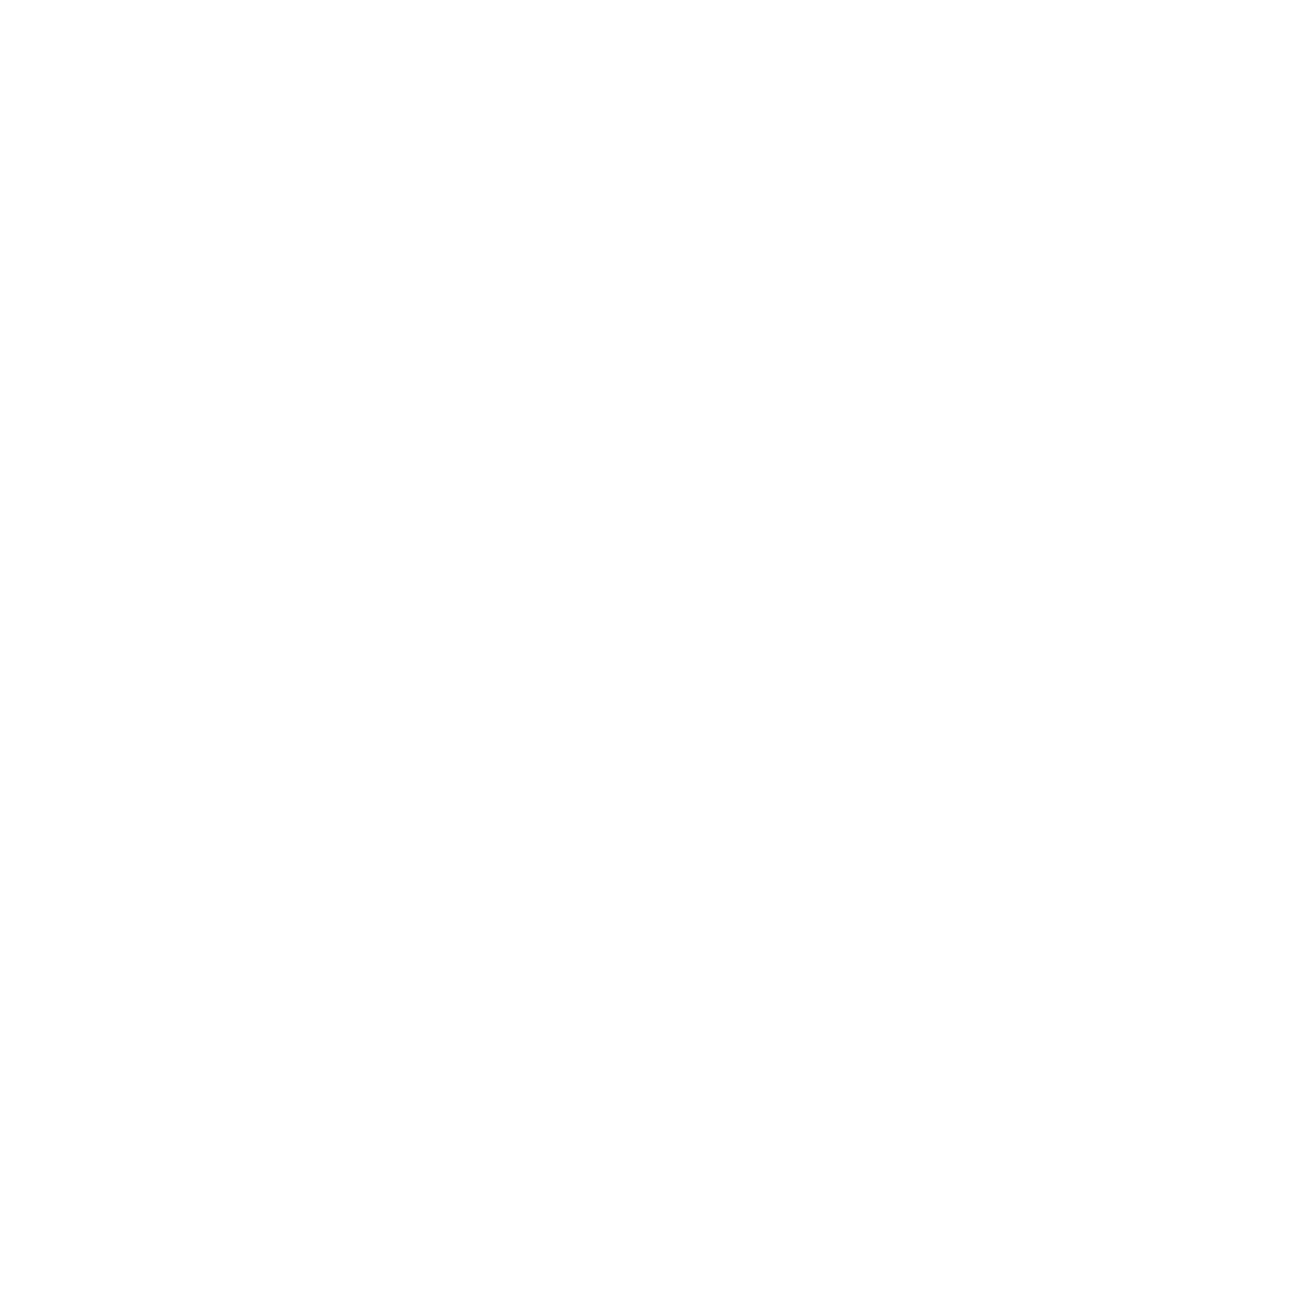

<IPython.core.display.Javascript object>


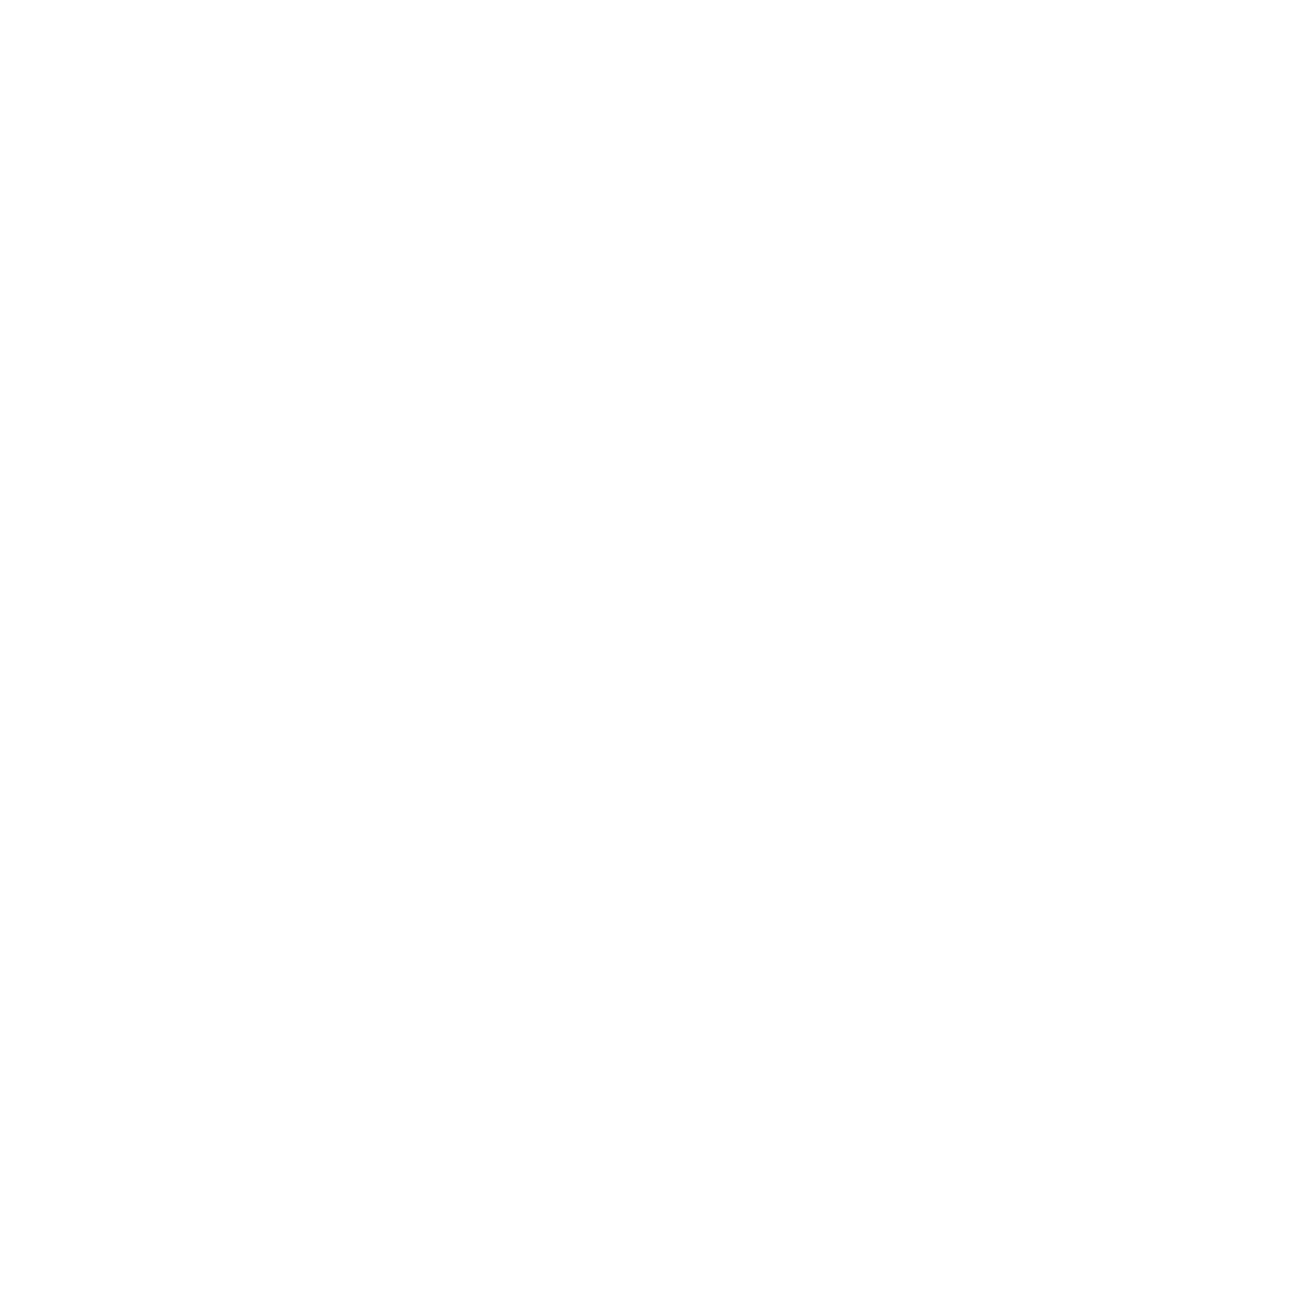

<IPython.core.display.Javascript object>


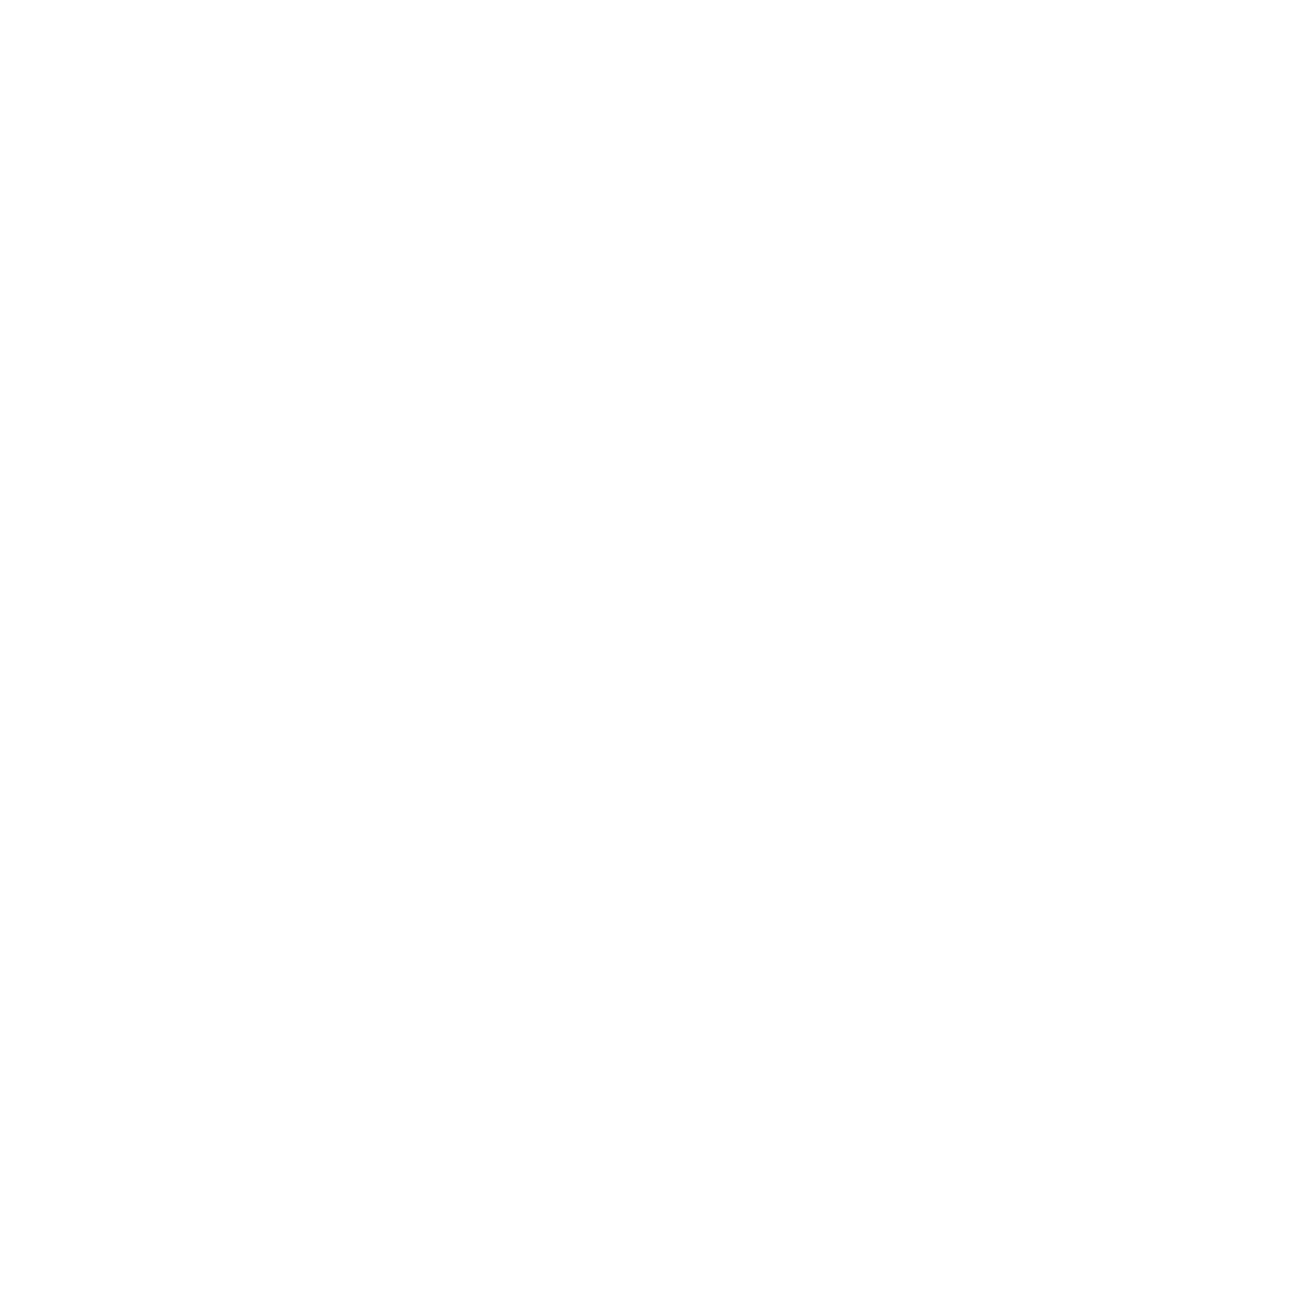

<IPython.core.display.Javascript object>


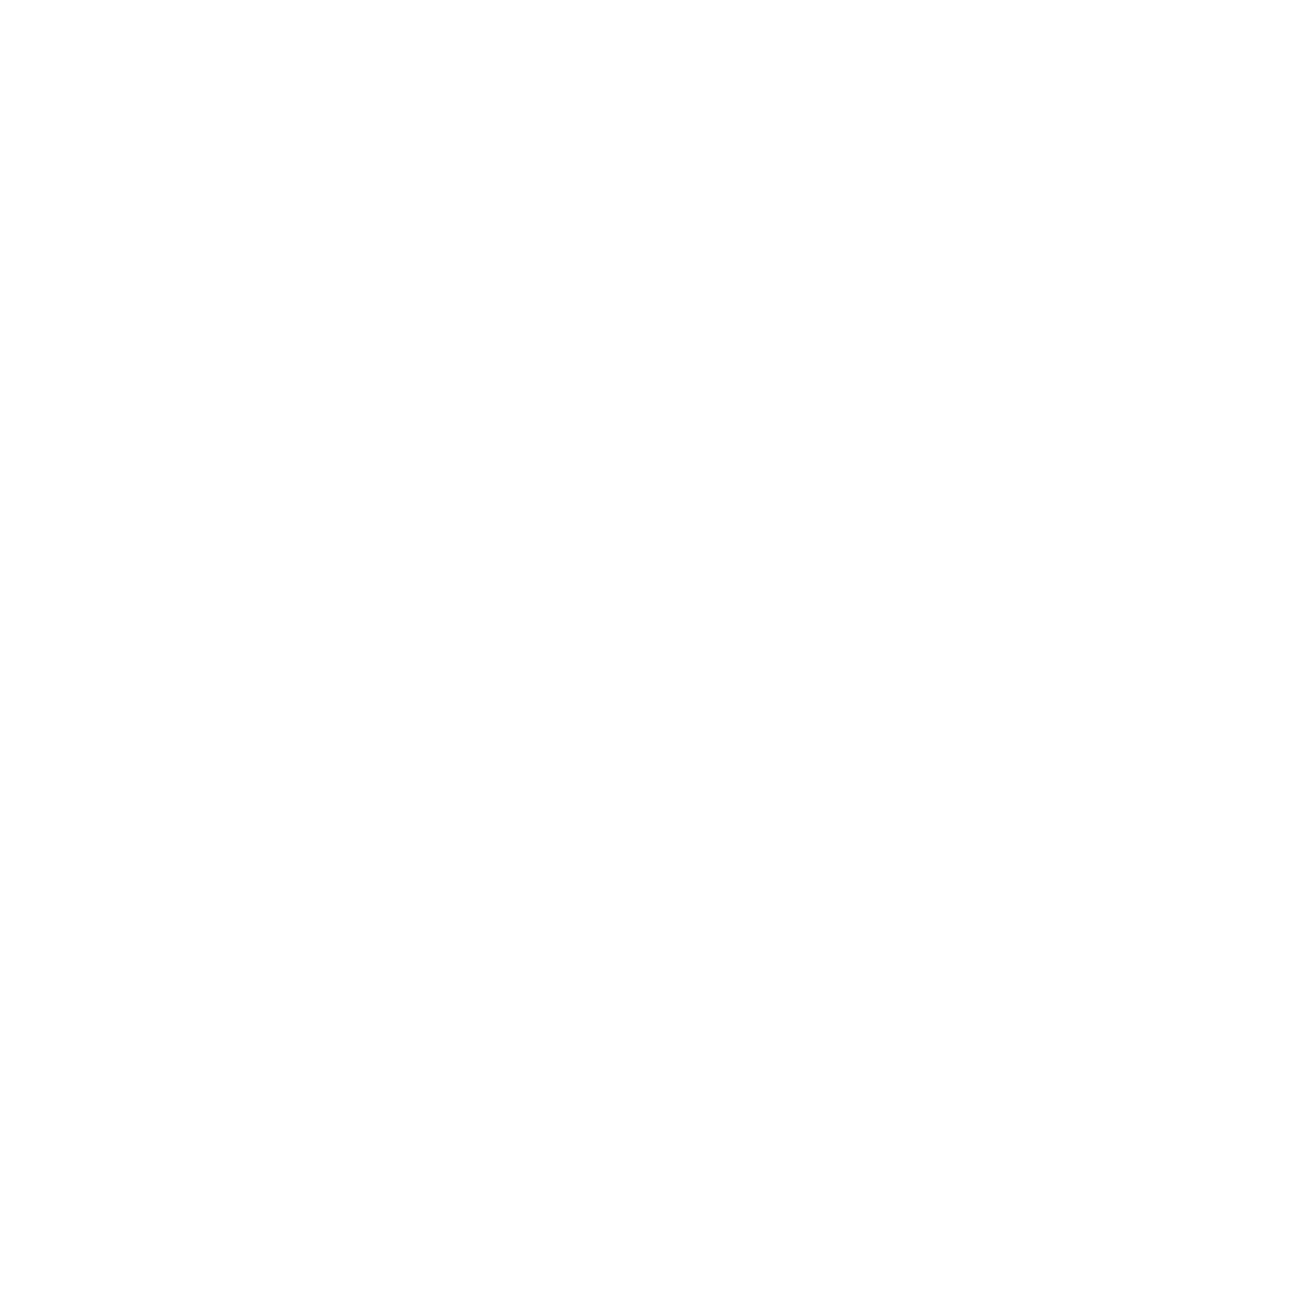

In [283]:
dx_interp = dx_i_deducted
dy_interp = dy_i_deducted

%matplotlib notebook

print XXX.shape, YYY.shape, dx_interp.shape

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter3D(XXX, YYY,  dx_interp)

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter3D(XXX, YYY,  dy_interp)

In [284]:
# find the highest position in dx dy and mag



(30, 30) (30, 30)


<IPython.core.display.Javascript object>


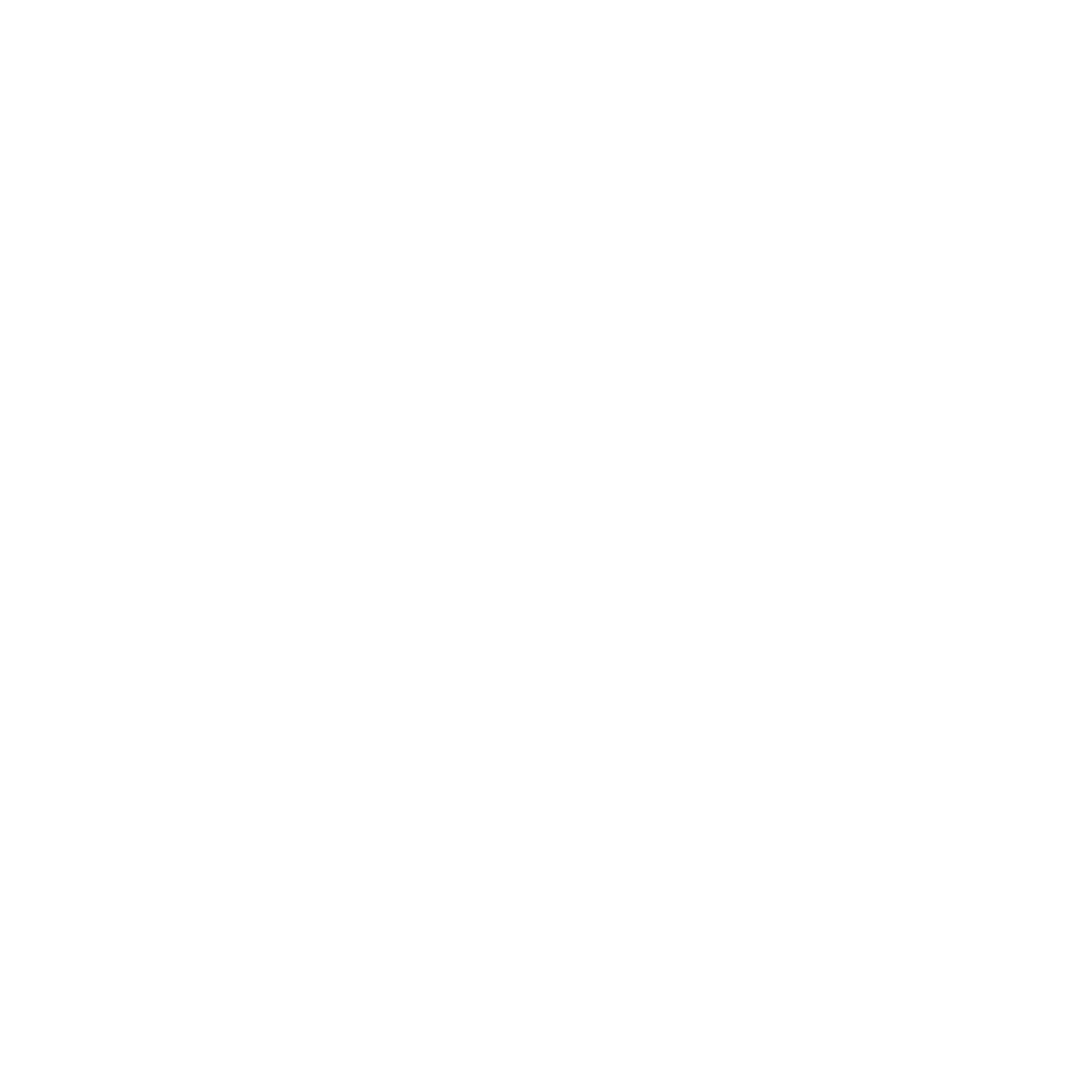

<IPython.core.display.Javascript object>


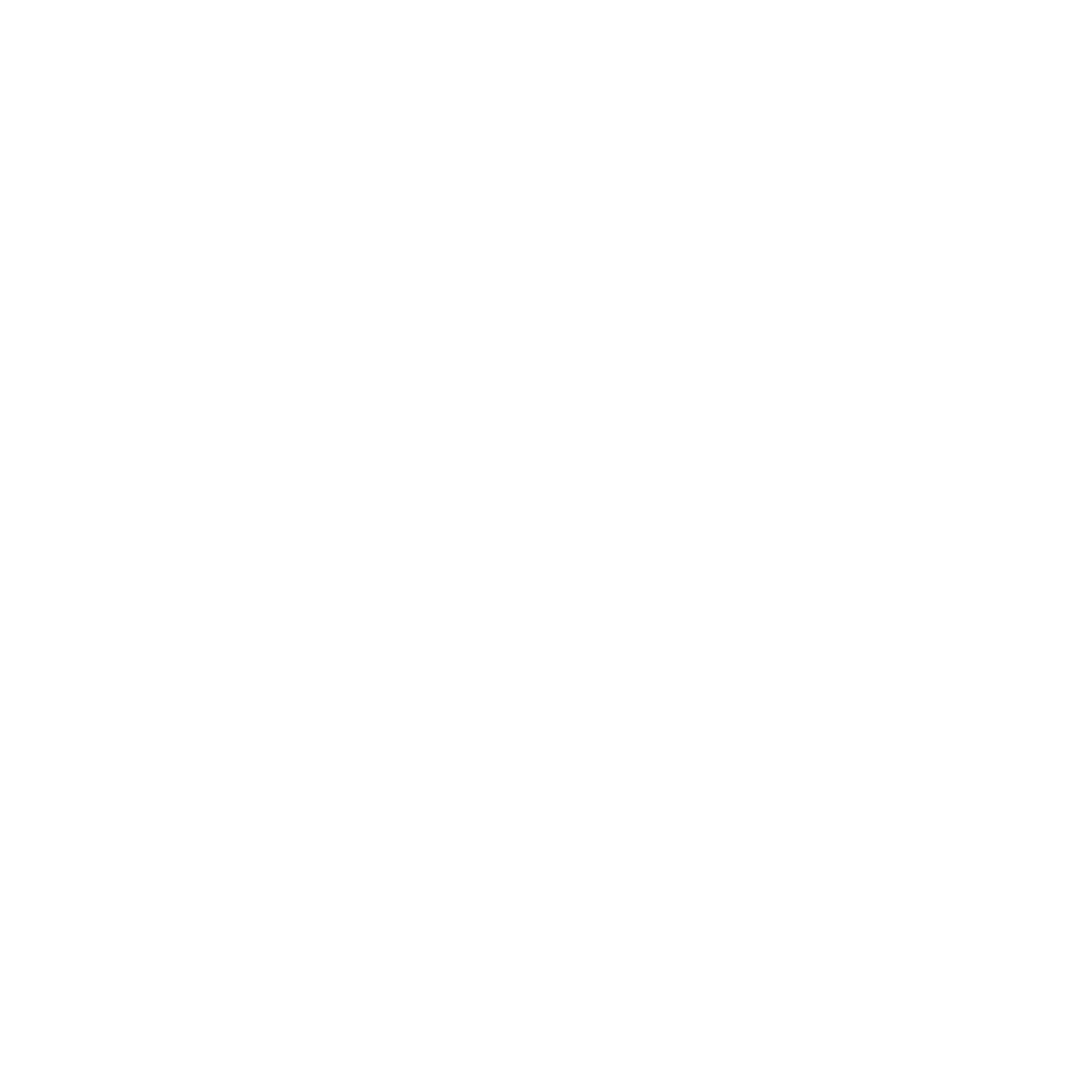

<IPython.core.display.Javascript object>


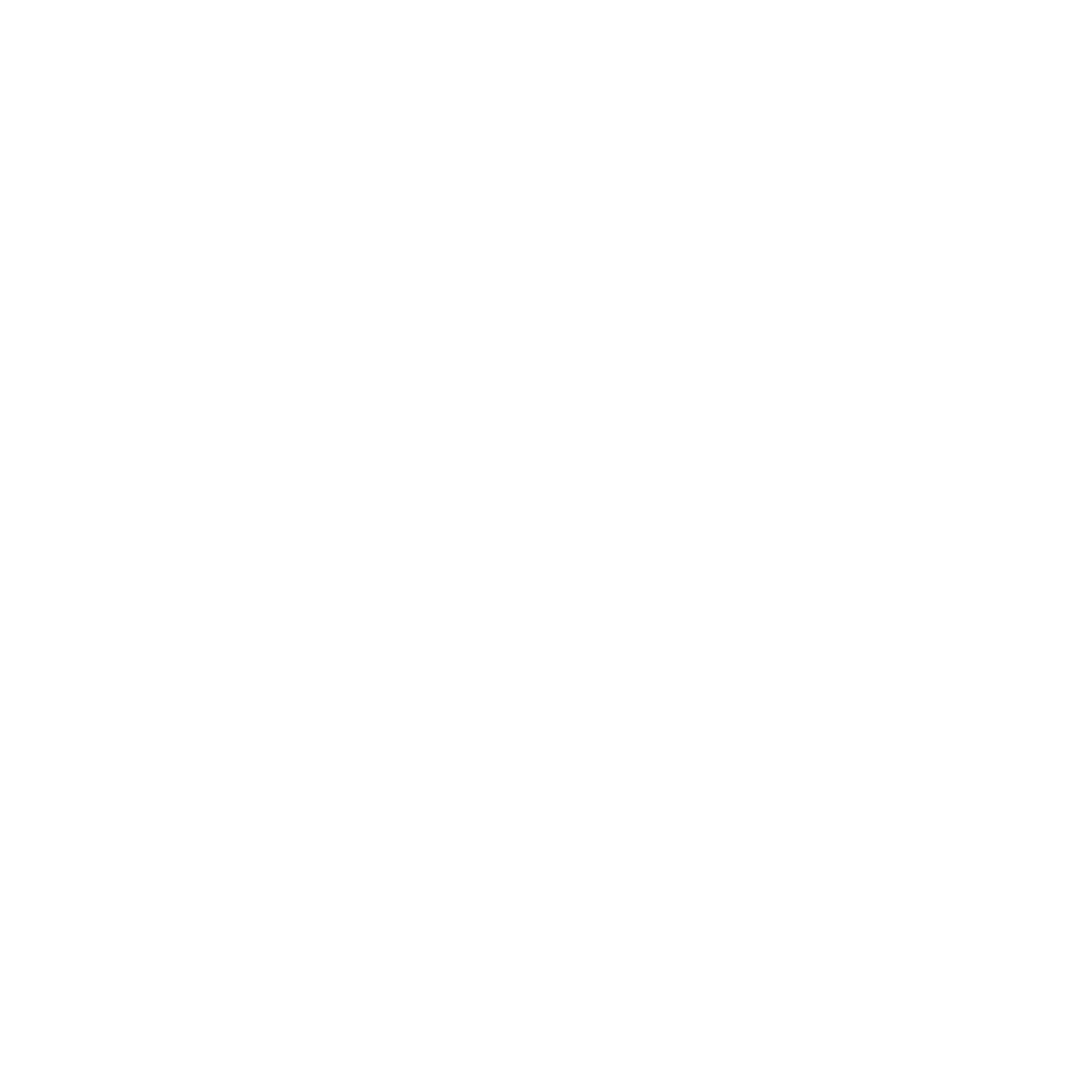

<IPython.core.display.Javascript object>


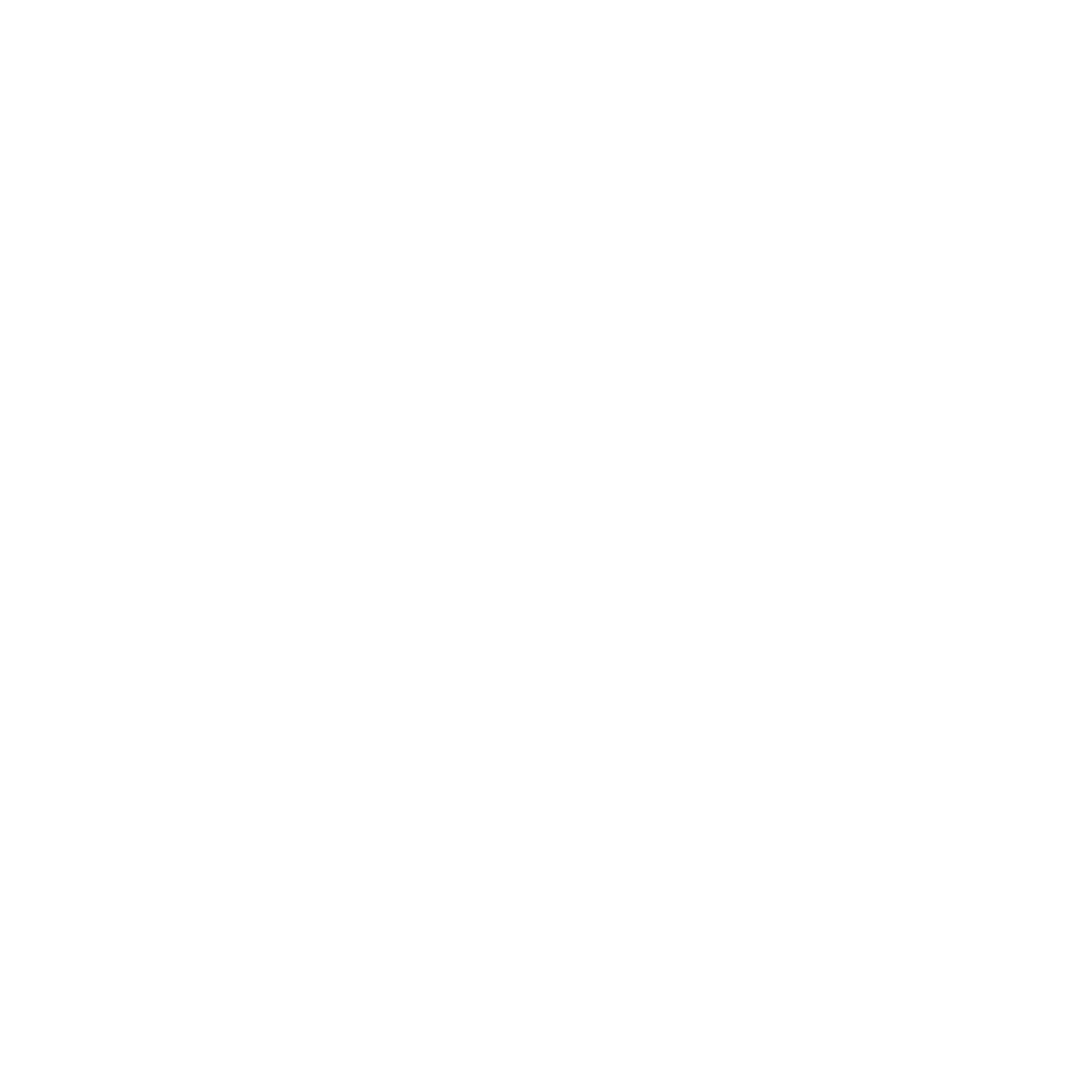

<IPython.core.display.Javascript object>


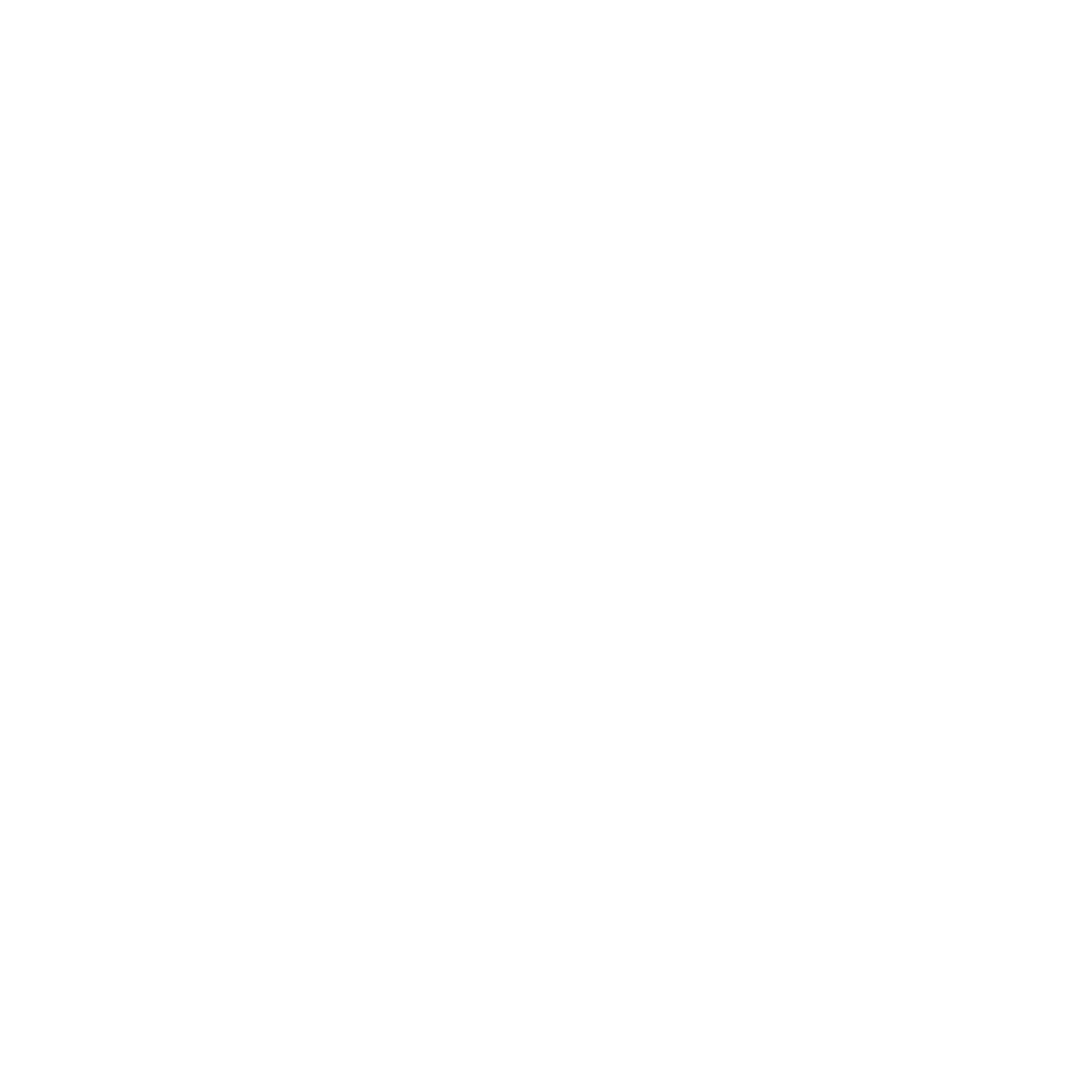

<IPython.core.display.Javascript object>


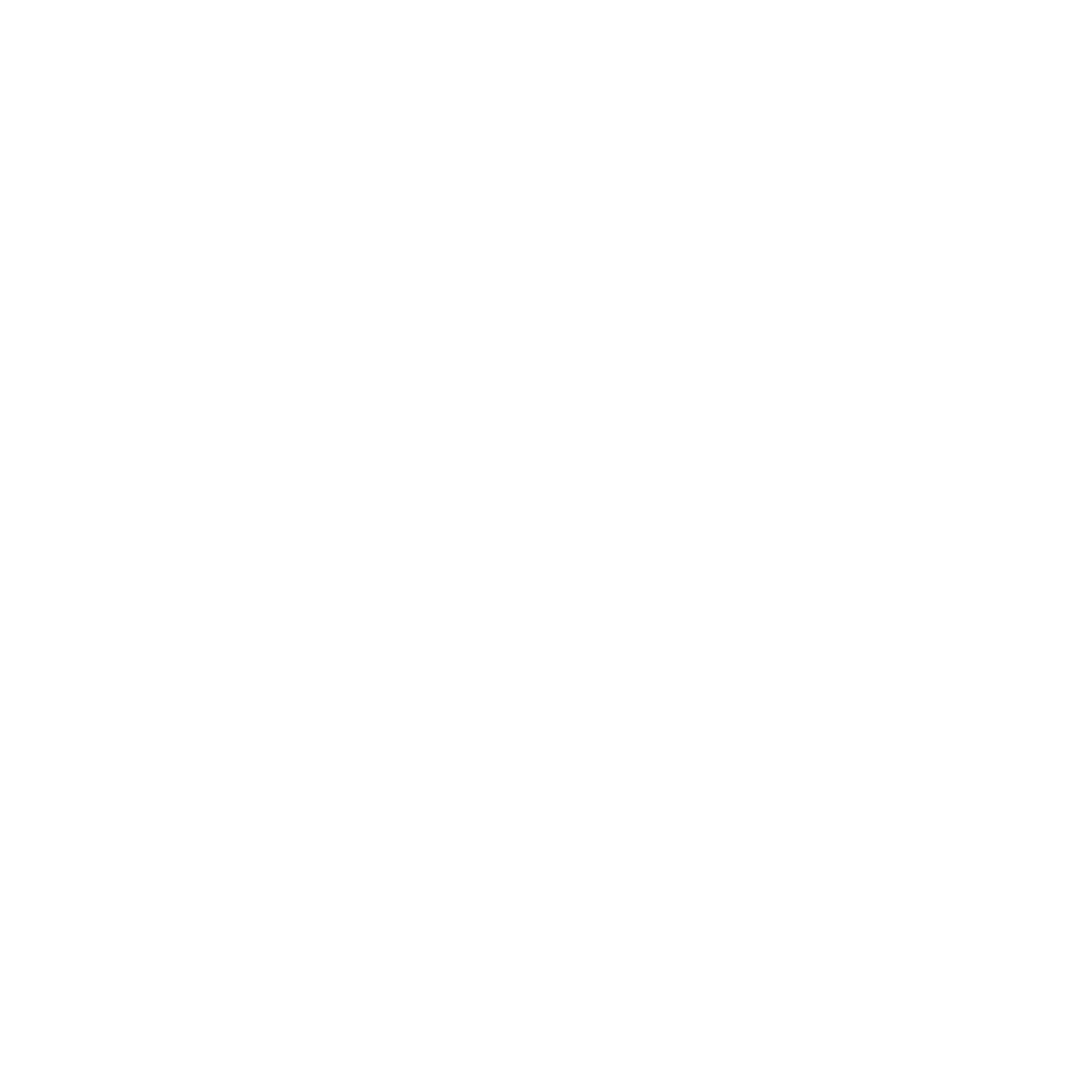

In [285]:
from matplotlib import cm

print XX.shape, YY.shape
fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
ax.view_init(30, 30)
surf = ax.plot_surface(XX, YY, dx_interp.reshape(Ny, Nx), cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)


fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
ax.view_init(30, 30)
surf = ax.plot_surface(XX, YY, dy_interp.reshape(Ny, Nx), cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)




fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
ax.view_init(30, 30)
surf = ax.plot_surface(XX, YY, mag.reshape(Ny, Nx), cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)

(30,) (30,) (30, 30)


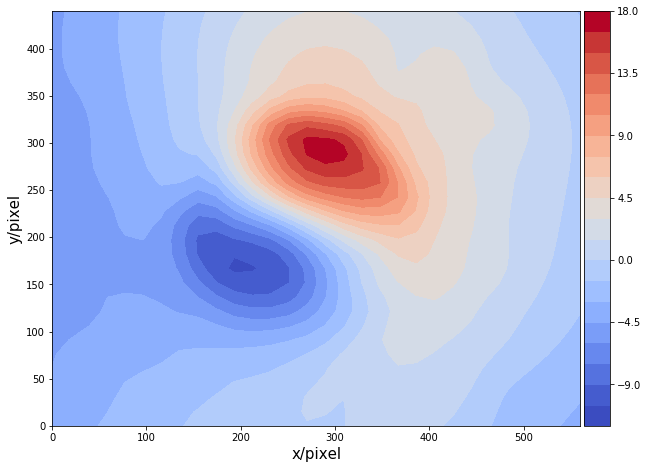

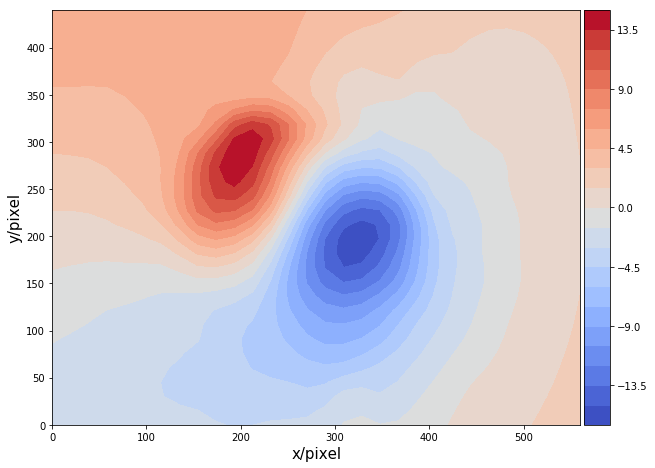

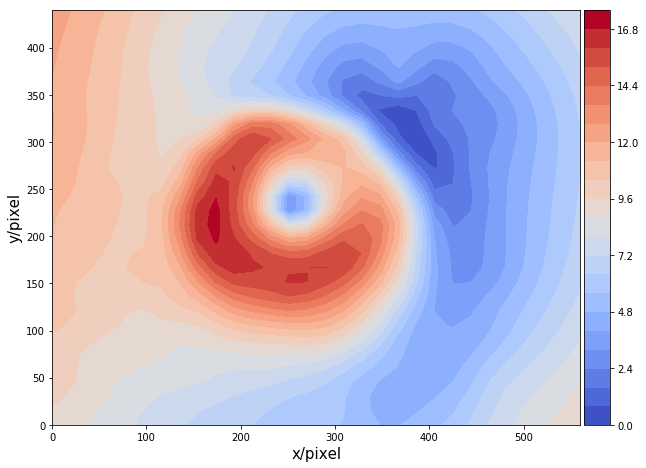

In [286]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# drawing contour
%matplotlib inline

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.set_aspect('equal')
cs  = ax.contourf(xx, yy, dx_interp.reshape(Nx, Ny), 25, cmap=plt.cm.coolwarm,
                  vmax=dx_interp.max(), vmin=dx_interp.min())
plt.xlabel('x/pixel',fontsize=15)
plt.ylabel('y/pixel',fontsize=15)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
# draw colorbar
plt.colorbar(cs, cax=cax)
# ax.plot(XXX_max_x, YYY_max_x, 'y+', markersize=30)
# ax.plot(XXX_min_x, YYY_min_x, 'y_', markersize=30, )
# ax.plot([XXX_max_x, XXX_min_x], [YYY_max_x, YYY_min_x], 'g', linewidth=3)




print xx.shape, yy.shape, dy_interp.reshape(Nx,Ny).shape

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.set_aspect('equal')
cs  = ax.contourf(xx, yy, dy_interp.reshape(Nx, Ny), 25, cmap=plt.cm.coolwarm,
                  vmax=dy_interp.max(), vmin=dy_interp.min())
plt.xlabel('x/pixel',fontsize=15)
plt.ylabel('y/pixel',fontsize=15)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
# draw colorbar
plt.colorbar(cs, cax=cax)




fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
ax.set_aspect('equal')
cs  = ax.contourf(xx, yy, mag.reshape(Nx, Ny), 25, cmap=plt.cm.coolwarm,
                  vmax=mag.max(), vmin=mag.min())
plt.xlabel('x/pixel',fontsize=15)
plt.ylabel('y/pixel',fontsize=15)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
# draw colorbar
plt.colorbar(cs, cax=cax)

# ax.plot(XXX_max_x, YYY_max_x, 'y+', markersize=30)
# ax.text(XXX_max_x, YYY_max_x, 'X_max', fontsize=20)
# ax.plot(XXX_min_x, YYY_min_x, 'y_', markersize=30, )
# ax.text(XXX_min_x, YYY_min_x, 'X_min', fontsize=20 )
# ax.plot([XXX_max_x, XXX_min_x], [YYY_max_x, YYY_min_x],  'g',  linewidth=3)
# ax.plot(XXX_max_y, YYY_max_y, 'c+', markersize=30)
# ax.text(XXX_max_y, YYY_max_y, 'Y_max', fontsize=20)
# ax.plot(XXX_min_y, YYY_min_y, 'c_', markersize=30, )
# ax.text(XXX_min_y, YYY_min_y, 'Y_min', fontsize=20 )
# ax.plot([XXX_max_y, XXX_min_y], [YYY_max_y, YYY_min_y],  'g',  linewidth=3)



# # calculate intersection of two lines
# # -m*x + y = XXX_min_y + m*XXX_min_x
# m_x = (XXX_max_y - XXX_min_y)/(XXX_max_x - XXX_min_x)
# m_y = (YYY_max_y - YYY_min_y)/(YYY_max_x - YYY_min_x)

# A = np.array([[-m_x, 1], [-m_y, 1]])
# B = np.array([XXX_min_y - m_x*XXX_min_x, YYY_min_y - m_y*YYY_min_x])

# point_intersec = np.linalg.solve(A, B)
# print point_intersec


In [37]:
import numpy as np

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata, Rbf
import time
from scipy import interpolate

start = time.time()
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
print time.time() - start
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
print time.time() - start
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
print time.time() - start

interp = Rbf(points[:, 0], points[:, 1], values, function='linear')

print time.time() - start
rbf_z = interp(grid_x, grid_y)
print time.time() - start


start = time.time()

tck = interpolate.bisplrep(points[:,0], points[:,0], values, s=0)
# grid_x1d = grid_x.ravel()
# grid_y1d = grid_y.ravel()
# print grid_x1d.shape
print time.time() - start
znew = interpolate.bisplev(grid_x[:,0], grid_y[0,:], tck)

print time.time() - start

0.0137469768524
0.0219421386719
0.0346121788025
0.0718591213226
0.374430179596
0.120075941086
0.12054681778


/usr/local/lib/python2.7/dist-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=24,24 m=1000 fp=2.627830 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


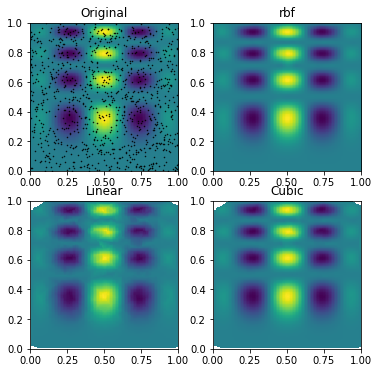

In [25]:
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(rbf_z.T, extent=(0,1,0,1), origin='lower')
plt.title('rbf')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
# plt.show()